In [1]:
import os
import numpy as np
import pickle as pkl
import pandas as pd
import pickle
from collections import defaultdict
import sys
sys.path.append('/home/ak/Documents/Research/PaperCode/stylised_facts')
import lob_for_futures
figures ='/home/ak/Documents/Research/Papers/figures/'

##
LaCie = '/media/ak/LaCie'
T7 = '/media/ak/T7'
FuturesDataSemiProcessed = os.path.join(T7, 'FuturesDataSemiProcessed')
MFDFAData = os.path.join(T7, 'MFDFA Experiments')
symbols = os.listdir(FuturesDataSemiProcessed)
import matplotlib.pyplot as plt
%matplotlib inline

In /home/ak/anaconda3/envs/mmd-kernels/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /home/ak/anaconda3/envs/mmd-kernels/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/ak/anaconda3/envs/mmd-kernels/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /home/ak/anaconda3/envs/mmd-kernels/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/ak/anaconda3/envs/mmd-kernels/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in 

In [2]:
####
def symbol_file_name_path(symbol, file_idx):
    symbolPath = os.path.join(experimentsDestination, str(symbol))
    file_names =sorted(os.listdir(symbolPath))
    file_name =file_names[file_idx]
    file_path =os.path.join(symbolPath, file_name)
    return file_names, file_path
def n_F(dicts, bar):
    df = pd.DataFrame.from_dict(dicts[str(bar)])
    n = df.index.values
    F = df.median(axis=1).values
    return n, F
def h_params(h_dict, bar):
    h_df = pd.DataFrame.from_dict(h_dict[str(bar)]).T.median(axis=0)
    H_intercept = h_df[1]
    H = h_df[0]
    return H_intercept, H


def open_pickle_filepath(pickle_file):
    pickle_to_file = pickle.load(open(pickle_file, "rb"), encoding='latin1')

    return pickle_to_file

In [3]:
import stylised_facts_data_utilities.mmd as mmd
import stylised_facts_data_utilities.ksd as ksd
import stylised_facts_data_utilities.longtaildistr as ltd
from scipy import stats

/home/ak/anaconda3/envs/mmd-kernels/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ak/anaconda3/envs/mmd-kernels/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ak/anaconda3/envs/mmd-kernels/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ak/anaconda3/envs/mmd-kernels/lib/pyt

In [4]:
symbol ='JB1'
experimentsDestination = '/media/ak/T7/MFDFA Experiments/' # where all the MFDFA results are stored
files = sorted(os.listdir(os.path.join('/media/ak/T7/MFDFA Experiments/', symbol))) # where the specific MFDFA results are
files # just a printout of which files are in there

['DFA_h_dict_valuesvolume_width100calendar_resample300S_bar_20180524_calendar.pkl',
 'DFA_n_f_valuesvolume_width100calendar_resample300S_bar_20180524_calendar.pkl',
 'DFA_n_f_valuesvolume_width100calendar_resample300S_bar_20180815_calendar.pkl',
 'MDFA_H_dictvolume_width100calendar_resample300S_bar_20180524_calendar.pkl',
 'MDFA_H_dictvolume_width100calendar_resample300S_bar_20180815_calendar.pkl',
 'MDFA_TAU_DICTvolume_width100calendar_resample300S_bar_20180524_calendar.pkl',
 'MDFA_TAU_DICTvolume_width100calendar_resample300S_bar_20180815_calendar.pkl',
 'MDFA_alpha_spectvolume_width100calendar_resample300S_bar_20180524_calendar.pkl',
 'MDFA_alpha_spectvolume_width100calendar_resample300S_bar_20180815_calendar.pkl',
 'MDFA_n_f_valuesvolume_width100calendar_resample300S_bar_20180524_calendar.pkl',
 'MDFA_n_f_valuesvolume_width100calendar_resample300S_bar_20180815_calendar.pkl']

In [5]:
## 'MFDFA_H_values_bar_calendar
mfdfa_alpha_spect_pickle_file_path = os.path.join(experimentsDestination,symbol, files[4]) # this is the h_dict mfdfa

mfdfa_tau_dict_file_path = os.path.join(experimentsDestination,symbol, files[3]) # this is the h_dict mfdfa

mfdfa_n_f_file_path = os.path.join(experimentsDestination,symbol,  files[2]) # this is the mfdfa
mfdfa_h_dict_path = os.path.join(experimentsDestination,symbol,  files[5])
print(mfdfa_h_dict_path )

/media/ak/T7/MFDFA Experiments/JB1/MDFA_TAU_DICTvolume_width100calendar_resample300S_bar_20180524_calendar.pkl


In [6]:
# f(a) versus a across different days

In [7]:
H_dicts = open_pickle_filepath(mfdfa_tau_dict_file_path)
# returns h_dict[j][i] = [H, H_intercept] # bar/date: H, H_intercept
barIdx =0 #0:tick, 1:volume
bars = ['tick', 'volume', 'dollar', 'calendar']
dates = list(H_dicts[bars[barIdx]].keys())

MFDFA_n_f_dicts = open_pickle_filepath(mfdfa_n_f_file_path)
print(mfdfa_n_f_file_path)
dicts= open_pickle_filepath(mfdfa_h_dict_path)

/media/ak/T7/MFDFA Experiments/JB1/DFA_n_f_valuesvolume_width100calendar_resample300S_bar_20180815_calendar.pkl


In [8]:
MFDFA_n_f_dicts

defaultdict(dict,
            {'tick': {'20180511': [0.3773636043765493, -11.18092932433365],
              '20180921': [0.7560222747891417, -10.802837973053359],
              '20180815': [0.6421933890882178, -10.524574826244786]},
             'volume': {'20180511': [0.3828297267522325, -11.775165702459413],
              '20180921': [0.5773979411401546, -11.252898820034455],
              '20180815': [0.5980622702297081, -11.484522423227558]},
             'dollar': {'20180511': [0.5140781830684408, -12.878237878888086],
              '20180921': [0.5906936150677582, -12.372903976075698],
              '20180815': [0.6180008961663104, -12.557547857002998]},
             'calendar': {'20180511': [0.4815321592958882, -11.91409237418691],
              '20180921': [0.6242972604116319, -10.631798133869278],
              '20180815': [0.5712178303953845, -10.609584788723971]}})

In [9]:
bar_choice = bars[barIdx]
# tick bar
mfSpect_tick =list()
alpha_tick =list()
# dollar bar
mfSpect_dollar =list()
alpha_dollar =list()

# # calendar bar
mfSpect_calendar =list()
alpha_calendar =list()

# calendar bar
mfSpect_volume =list()
alpha_volume =list()


for i in range(len(dates)):
    mfSpect_tick.append(dicts[str(bar_choice)][dates[i]][0])
    alpha_tick.append(dicts[str(bar_choice)][dates[i]][1])
    # dollar
    mfSpect_dollar.append(dicts['dollar'][dates[i]][0])
    alpha_dollar.append(dicts['dollar'][dates[i]][1])
    # calendar
    mfSpect_calendar.append(dicts['calendar'][dates[i]][0])
    alpha_calendar.append(dicts['calendar'][dates[i]][1])
    # usd volume
    mfSpect_volume.append(dicts['volume'][dates[i]][0])
    alpha_volume.append(dicts['volume'][dates[i]][1])
    

In [10]:
'tick'
x_tick = pd.DataFrame(list(map(np.ravel, mfSpect_tick))).median(axis=0)
y_tick = pd.DataFrame(list(map(np.ravel, alpha_tick))).median(axis=0)
'dollar'
x_dollar = pd.DataFrame(list(map(np.ravel, mfSpect_dollar))).median(axis=0)
y_dollar = pd.DataFrame(list(map(np.ravel, alpha_dollar))).median(axis=0)

'calendar'
x_calendar = pd.DataFrame(list(map(np.ravel, mfSpect_calendar))).median(axis=0)
y_calendar = pd.DataFrame(list(map(np.ravel, alpha_calendar))).median(axis=0)

'volume'
x_volume = pd.DataFrame(list(map(np.ravel, mfSpect_volume))).median(axis=0)
y_volume = pd.DataFrame(list(map(np.ravel, alpha_volume))).median(axis=0)


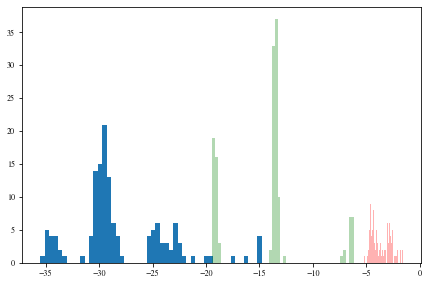

In [12]:
_ = plt.hist(mfSpect_calendar, bins =50)
_ = plt.hist(mfSpect_volume, bins =50, color ='red', alpha =0.3)
_ = plt.hist(mfSpect_tick, bins =50, color ='g', alpha =0.3)


In [14]:
import seaborn as sns

df_list = [pd.Series(mfSpect_tick), pd.Series(mfSpect_volume), pd.Series(mfSpect_calendar), pd.Series(mfSpect_dollar)]
all_dfs = pd.concat(df_list, axis=1)
all_dfs.columns = [ 'tick', 'volume', 'calendar', 'dollar' ]


/home/ak/anaconda3/envs/mmd-kernels/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


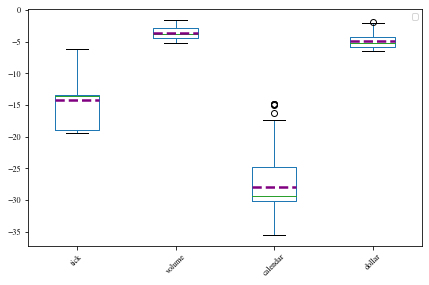

In [15]:
boxprops = dict(linestyle='--', linewidth=3, color='darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  markeredgecolor='none')
medianprops = dict(linestyle='-.', linewidth=2.5, color='firebrick')
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')
meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')
all_dfs.boxplot(grid=False, rot=45, meanprops=meanlineprops, meanline=True,
                  showmeans=True)


plt.legend()

In [41]:
#multifractal spectral width given the change in clock, describe the reasons why this could be the case
# will that make the distributions be different?

-14.798234140735929